In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("deceptive.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [3]:
data.shape

(11054, 32)

In [4]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [8]:
data.nunique()


Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [9]:
data = data.drop(['Index'],axis = 1)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


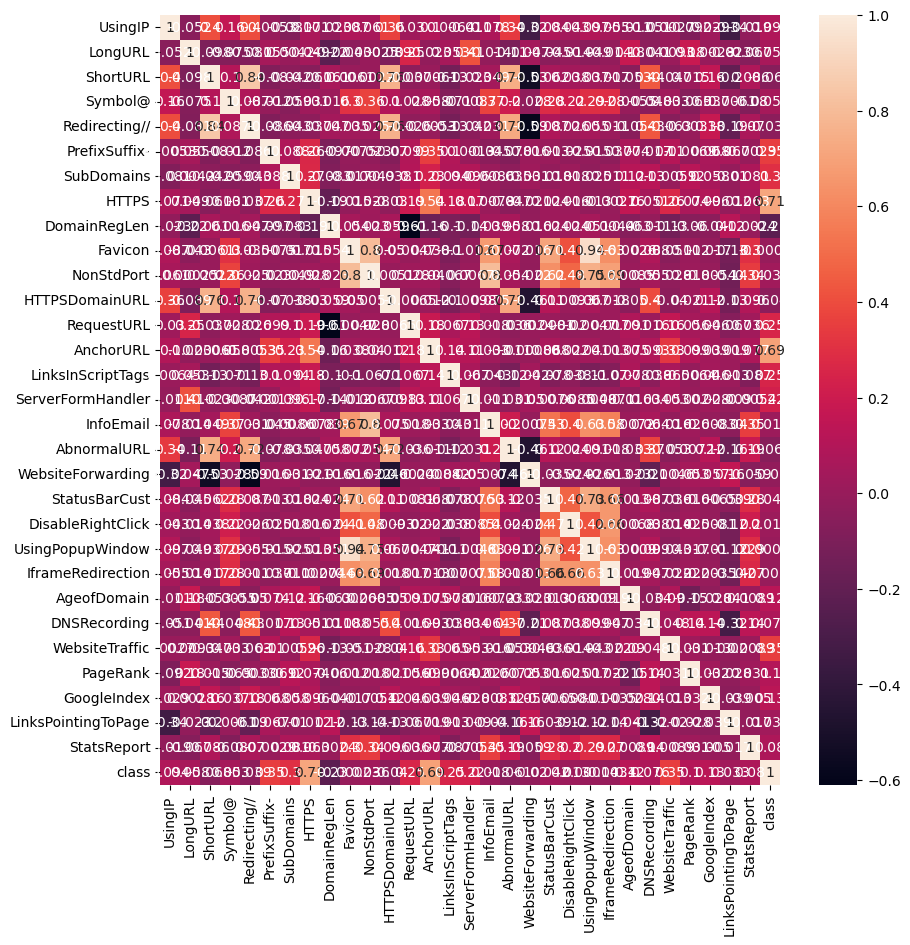

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

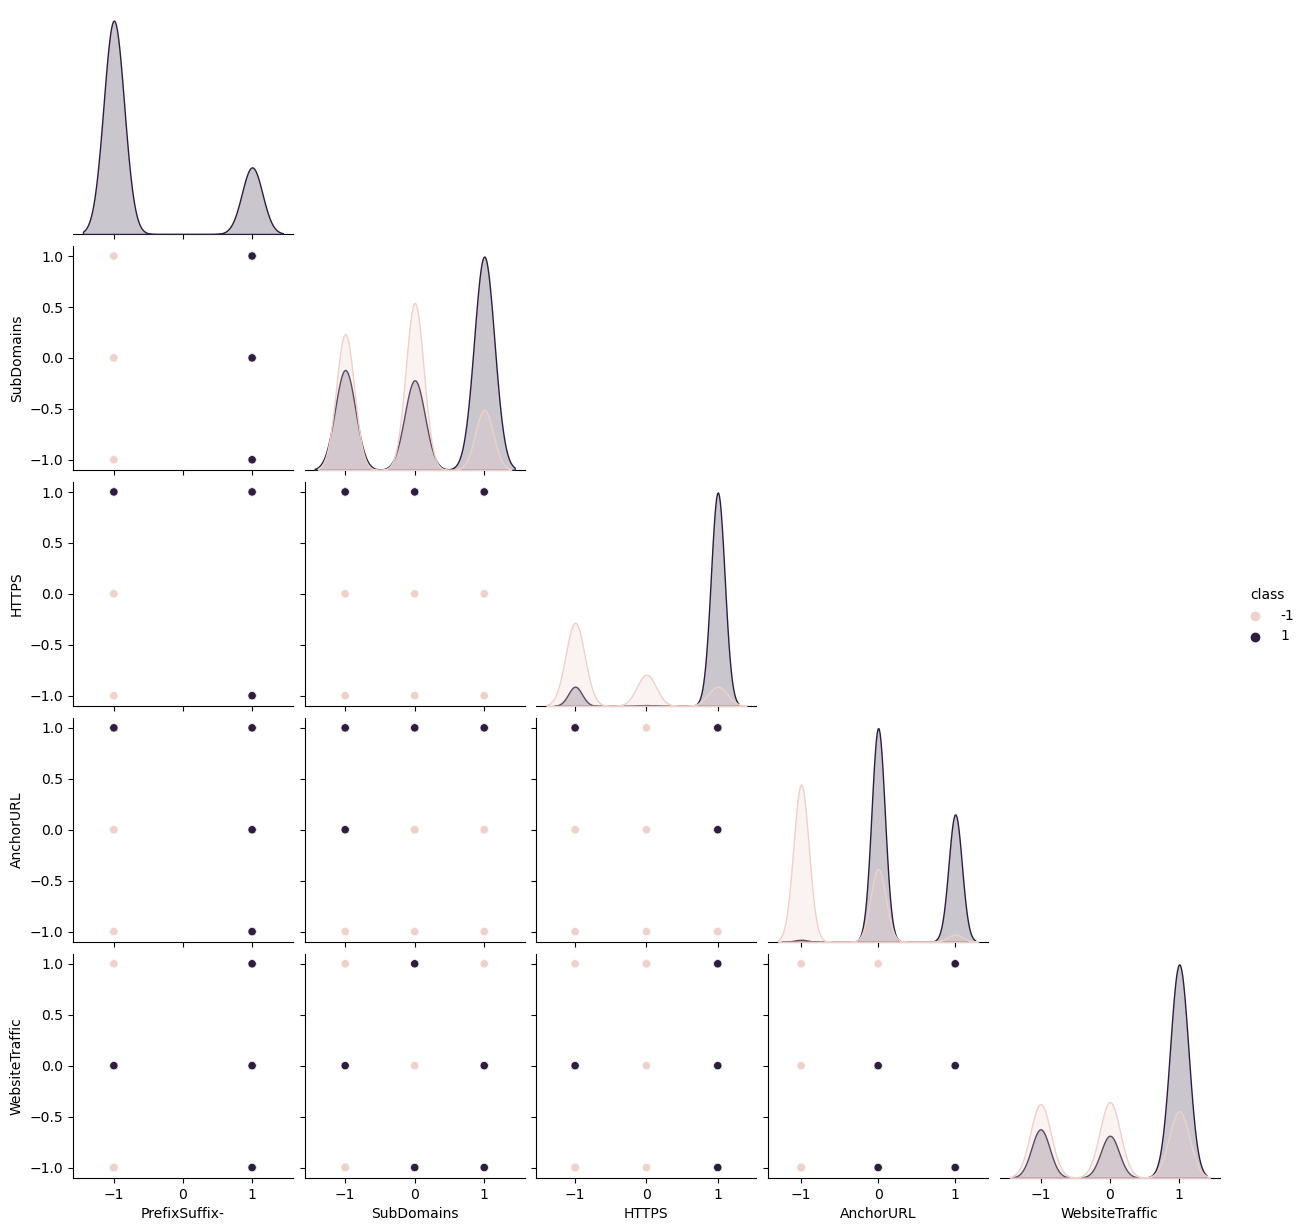

In [12]:
df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);

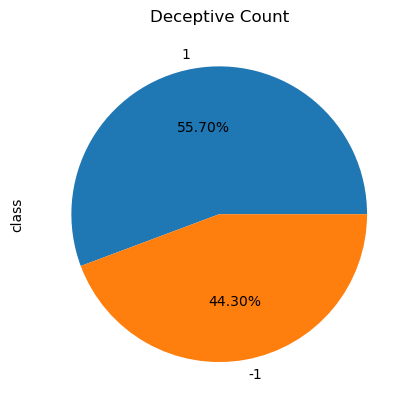

In [13]:
data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Deceptive Count")
plt.show()

In [14]:
X = data.drop(["class"],axis =1)
y = data["class"]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [16]:
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Instantiate the logistic regression model
logistic_model = LogisticRegression()


In [18]:
# Train the model
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Training evaluation
y_train_pred = logistic_model.predict(X_train)
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
f1_score_train = metrics.f1_score(y_train, y_train_pred)
recall_train = metrics.recall_score(y_train, y_train_pred)
precision_train = metrics.precision_score(y_train, y_train_pred)

In [20]:
# Testing evaluation
y_test_pred = logistic_model.predict(X_test)
accuracy_test_log = metrics.accuracy_score(y_test, y_test_pred)
f1_score_test_log = metrics.f1_score(y_test, y_test_pred)
recall_test_log = metrics.recall_score(y_test, y_test_pred)
precision_test_log = metrics.precision_score(y_test, y_test_pred)
classification_report = metrics.classification_report(y_test, y_test_pred)


In [21]:
# Print evaluation metrics
print("Logistic Regression Training Evaluation:")
print("Accuracy: {:.3f}".format(accuracy_train))
print("F1 score: {:.3f}".format(f1_score_train))
print("Recall: {:.3f}".format(recall_train))
print("Precision: {:.3f}".format(precision_train))

Logistic Regression Training Evaluation:
Accuracy: 0.927
F1 score: 0.935
Recall: 0.943
Precision: 0.927


In [22]:
print("\nLogistic Regression Testing Evaluation:")
print("Accuracy: {:.3f}".format(accuracy_test_log))
print("F1 score: {:.3f}".format(f1_score_test_log))
print("Recall: {:.3f}".format(recall_test_log))
print("Precision: {:.3f}".format(precision_test_log))
print("\nClassification Report:\n", classification_report)


Logistic Regression Testing Evaluation:
Accuracy: 0.934
F1 score: 0.941
Recall: 0.953
Precision: 0.930

Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [23]:
import pandas as pd

# Initialize an empty list to store results
results = []

# Function to call for storing the results
def storeResults(model, accuracy, f1_score, recall, precision):
    results.append({'Model': model,
                    'Accuracy': accuracy,
                    'F1 Score': f1_score,
                    'Recall': recall,
                    'Precision': precision})

# Then, after each evaluation, you call the storeResults function to store the results.
# For example, after evaluating the testing phase of your logistic regression model:

# Store testing results
storeResults("Logistic Regression (Testing)", accuracy_test_log, f1_score_test_log, recall_test_log, precision_test_log)

# Once you have stored all the results you want, you can convert the list to a DataFrame
results_df = pd.DataFrame(results)


In [24]:
pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training):\n", conf_matrix_train)

# Confusion matrix for testing set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Testing):\n", conf_matrix_test)


Confusion Matrix (Training):
 [[3553  368]
 [ 280 4642]]

Confusion Matrix (Testing):
 [[ 887   89]
 [  58 1177]]


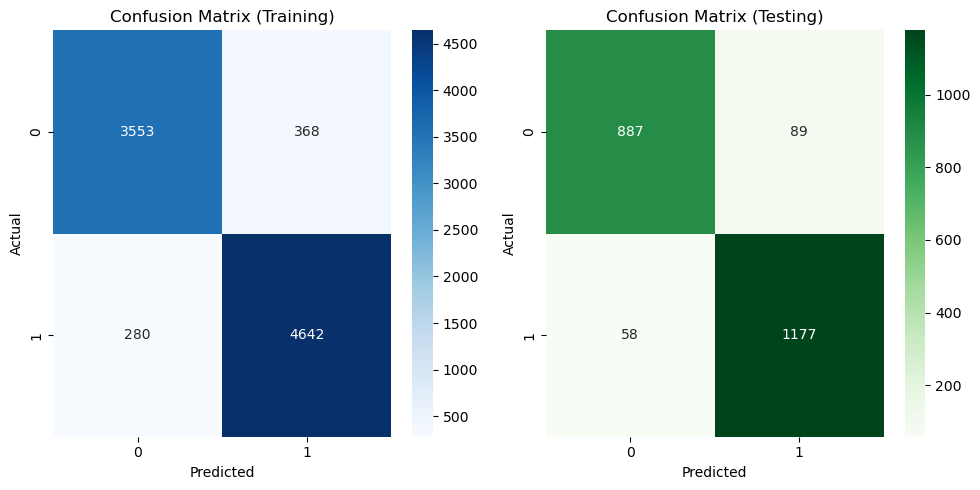

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already computed the confusion matrices for training and testing sets
# conf_matrix_train = confusion_matrix(y_train, y_train_pred)
# conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Instantiate the logistic regression model with the best parameters
best_logistic_model = LogisticRegression(**best_params)

# Train the model with the best parameters
best_logistic_model.fit(X_train, y_train)

# Testing evaluation with the best model
y_test_pred_best = best_logistic_model.predict(X_test)
accuracy_test_best = metrics.accuracy_score(y_test, y_test_pred_best)
f1_score_test_best = metrics.f1_score(y_test, y_test_pred_best)
recall_test_best = metrics.recall_score(y_test, y_test_pred_best)
precision_test_best = metrics.precision_score(y_test, y_test_pred_best)

# Print evaluation metrics for the best model
print("\nLogistic Regression Testing Evaluation (Best Model):")
print("Accuracy: {:.3f}".format(accuracy_test_best))
print("F1 score: {:.3f}".format(f1_score_test_best))
print("Recall: {:.3f}".format(recall_test_best))
print("Precision: {:.3f}".format(precision_test_best))


Logistic Regression Testing Evaluation (Best Model):
Accuracy: 0.935
F1 score: 0.942
Recall: 0.955
Precision: 0.930


KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [29]:
# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as per your requirement


# Train the classifier on the entire dataset
knn.fit(X, y)

# Make predictions on the training set
y_train_pred = knn.predict(X_train)

# Evaluate the model on the training set
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
precision_train = metrics.precision_score(y_train, y_train_pred)
recall_train = metrics.recall_score(y_train, y_train_pred)
f1_score_train = metrics.f1_score(y_train, y_train_pred)

# Print the evaluation metrics for training
print("\nTraining Evaluation Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)



Training Evaluation Metrics:
Accuracy: 0.9668664480379962
Precision: 0.9680485338725986
Recall: 0.9725721251523771
F1 Score: 0.970305057261579


In [30]:
# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as per your requirement

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy_knn = metrics.accuracy_score(y_test, y_pred)
precision_knn = metrics.precision_score(y_test, y_pred)
recall_knn = metrics.recall_score(y_test, y_pred)
f1_score_knn = metrics.f1_score(y_test, y_pred)

# Print the evaluation metrics for testing
print("Testing Evaluation Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_score_knn)



Testing Evaluation Metrics:
Accuracy: 0.9412030755314338
Precision: 0.9423538831064852
Recall: 0.9530364372469635
F1 Score: 0.9476650563607085


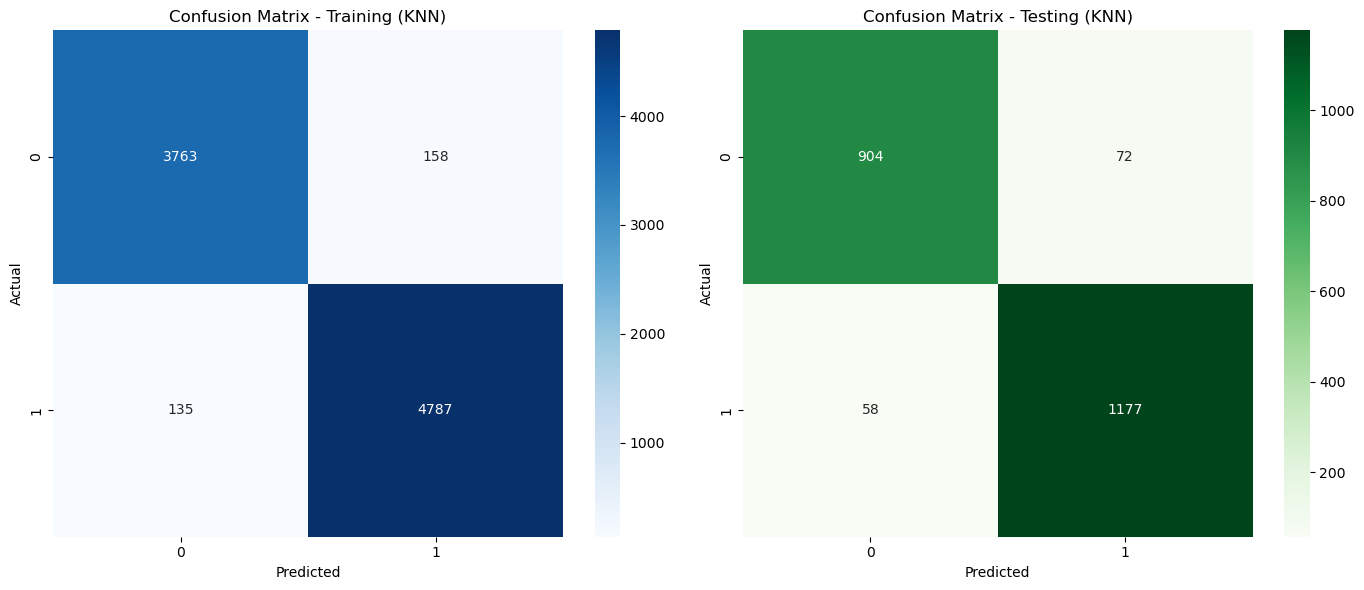

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for training set
conf_matrix_train_knn = confusion_matrix(y_train, y_train_pred)

# Compute confusion matrix for testing set
conf_matrix_test_knn = confusion_matrix(y_test, y_pred)

# Plot confusion matrices
plt.figure(figsize=(14, 6))

# Plot confusion matrix for training set
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_knn, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Training (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for testing set with green color
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_knn, annot=True, cmap='Greens', fmt='g')  # Change cmap to Greens
plt.title('Confusion Matrix - Testing (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_knn.predict(X_test)

# Print evaluation metrics
accuracy_knn_best = metrics.accuracy_score(y_test, y_pred)
precision_knn_best = metrics.precision_score(y_test, y_pred)
recall_knn_best = metrics.recall_score(y_test, y_pred)
f1_score_knn_best = metrics.f1_score(y_test, y_pred)

print("\nBest Model Evaluation Metrics:")
print("Accuracy:", accuracy_knn_best)
print("Precision:", precision_knn_best)
print("Recall:", recall_knn_best)
print("F1 Score:", f1_score_knn_best)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy: 0.9609866632220572

Best Model Evaluation Metrics:
Accuracy: 0.9606512890094979
Precision: 0.9562798092209857
Recall: 0.974089068825911
F1 Score: 0.9651022864019254


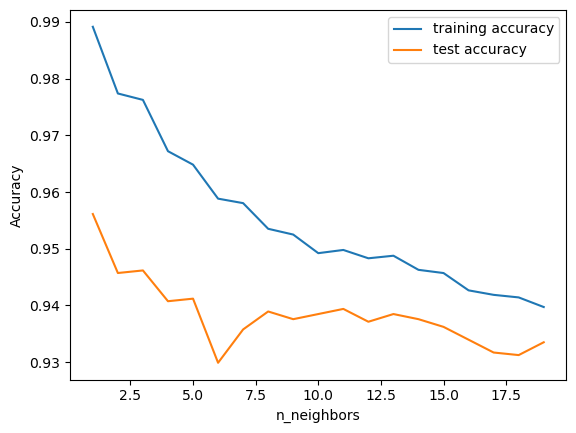

In [33]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

SVM

In [34]:
from sklearn.svm import SVC
from sklearn import metrics

# Instantiate the SVM classifier
svm_model = SVC()


In [35]:
# Train the SVM model
svm_model.fit(X_train, y_train)

# Predictions on training set
y_train_pred = svm_model.predict(X_train)
# Predictions on test set
y_test_pred = svm_model.predict(X_test)

In [36]:
# Evaluation metrics for training set
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
train_precision = metrics.precision_score(y_train, y_train_pred)
train_recall = metrics.recall_score(y_train, y_train_pred)
train_f1_score = metrics.f1_score(y_train, y_train_pred)

# Evaluation metrics for test set
test_accuracy_svm = metrics.accuracy_score(y_test, y_test_pred)
test_precision_svm = metrics.precision_score(y_test, y_test_pred)
test_recall_svm = metrics.recall_score(y_test, y_test_pred)
test_f1_score_svm = metrics.f1_score(y_test, y_test_pred)

In [37]:
# Print evaluation metrics
print("SVM Training Metrics:")
print("Accuracy: {:.3f}".format(train_accuracy))
print("Precision: {:.3f}".format(train_precision))
print("Recall: {:.3f}".format(train_recall))
print("F1 Score: {:.3f}".format(train_f1_score))

SVM Training Metrics:
Accuracy: 0.953
Precision: 0.947
Recall: 0.969
F1 Score: 0.958


In [38]:
print("\nSVM Testing Metrics:")
print("Accuracy: {:.3f}".format(test_accuracy_svm))
print("Precision: {:.3f}".format(test_precision_svm))
print("Recall: {:.3f}".format(test_recall_svm))
print("F1 Score: {:.3f}".format(test_f1_score_svm))


SVM Testing Metrics:
Accuracy: 0.951
Precision: 0.941
Recall: 0.973
F1 Score: 0.957


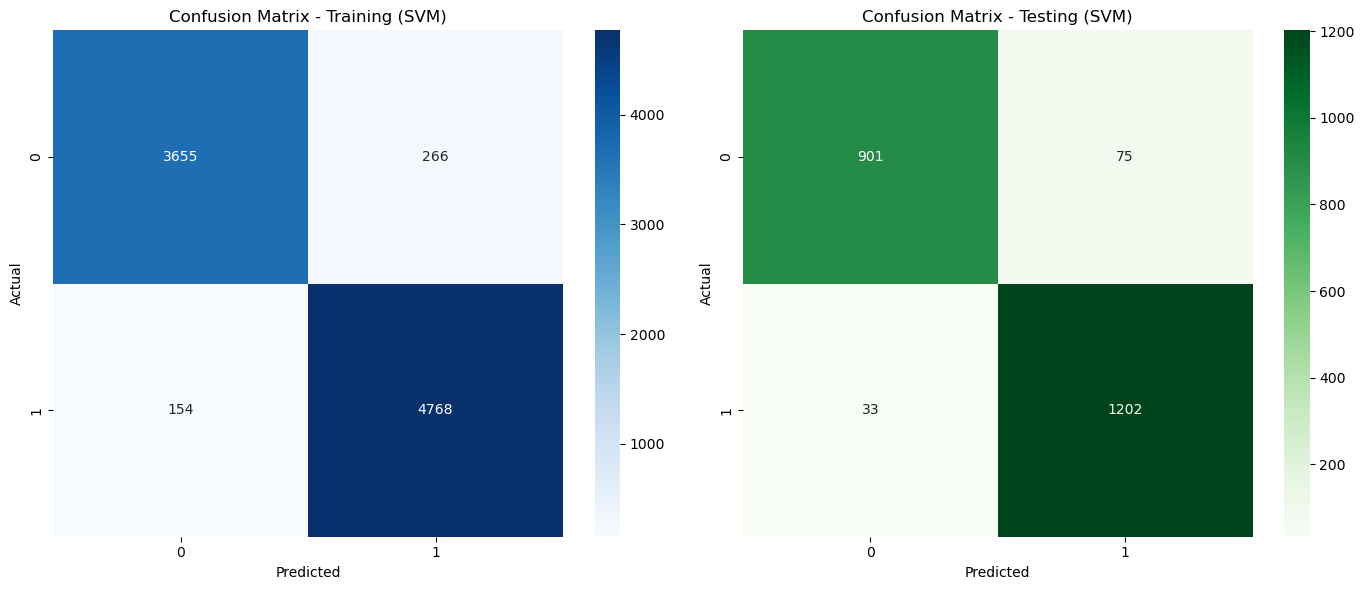

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for training set
conf_matrix_train_svm = confusion_matrix(y_train, y_train_pred)

# Compute confusion matrix for testing set
conf_matrix_test_svm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices
plt.figure(figsize=(14, 6))

# Plot confusion matrix for training set
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_svm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Training (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_svm, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix - Testing (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': ['scale', 'auto']      # Kernel coefficient for 'rbf' kernel
}

# Instantiate the SVM classifier
svm_classifier = SVC()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_svm = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_svm.predict(X_test)

# Print evaluation metrics
accuracy_svm_best = metrics.accuracy_score(y_test, y_pred)
precision_svm_best = metrics.precision_score(y_test, y_pred)
recall_svm_best = metrics.recall_score(y_test, y_pred)
f1_score_svm_best = metrics.f1_score(y_test, y_pred)

print("\nBest Model Evaluation Metrics:")
print("Accuracy:", accuracy_svm_best)
print("Precision:", precision_svm_best)
print("Recall:", recall_svm_best)
print("F1 Score:", f1_score_svm_best)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.9616638615266954

Best Model Evaluation Metrics:
Accuracy: 0.9629127091813658
Precision: 0.9593625498007968
Recall: 0.9748987854251012
F1 Score: 0.9670682730923695


NAIVE BAYES

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Instantiate the Naive Bayes classifier
naive_bayes = GaussianNB()

In [42]:
# Train the model
naive_bayes.fit(X_train, y_train)

# Predict on the training set
y_train_pred = naive_bayes.predict(X_train)

# Predict on the test set
y_test_pred = naive_bayes.predict(X_test)

In [43]:
# Evaluate the model on training data
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
precision_train = metrics.precision_score(y_train, y_train_pred)
recall_train = metrics.recall_score(y_train, y_train_pred)
f1_score_train = metrics.f1_score(y_train, y_train_pred)

# Evaluate the model on test data
accuracy_nb = metrics.accuracy_score(y_test, y_test_pred)
precision_nb = metrics.precision_score(y_test, y_test_pred)
recall_nb = metrics.recall_score(y_test, y_test_pred)
f1_score_nb = metrics.f1_score(y_test, y_test_pred)

In [44]:
# Print evaluation metrics for training data
print("Training Data Evaluation Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print()

Training Data Evaluation Metrics:
Accuracy: 0.605224471333258
Precision: 0.9965301873698821
Recall: 0.29175132060138154
F1 Score: 0.45135942165645127



In [45]:
# Print evaluation metrics for test data
print("Test Data Evaluation Metrics:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_score_nb)

Test Data Evaluation Metrics:
Accuracy: 0.6047037539574853
Precision: 0.9945205479452055
Recall: 0.29392712550607286
F1 Score: 0.45374999999999993


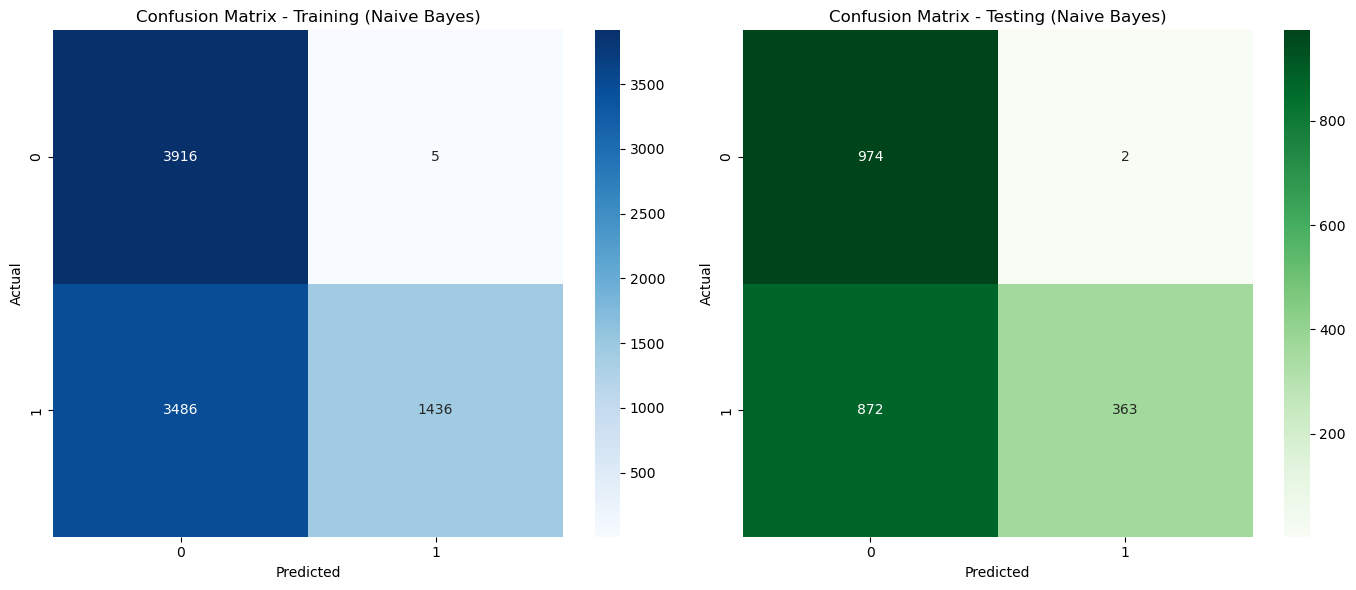

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for training set
conf_matrix_train_nb = confusion_matrix(y_train, y_train_pred)

# Compute confusion matrix for test set
conf_matrix_test_nb = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices
plt.figure(figsize=(14, 6))

# Plot confusion matrix for training set
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Training (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_nb, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix - Testing (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Instantiate the Naive Bayes classifier
naive_bayes = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Variation smoothing parameter
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_naive_bayes = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_naive_bayes.predict(X_test)

# Print evaluation metrics
accuracy_nb_best = metrics.accuracy_score(y_test, y_pred)
precision_nb_best = metrics.precision_score(y_test, y_pred)
recall_nb_best = metrics.recall_score(y_test, y_pred)
f1_score_nb_best = metrics.f1_score(y_test, y_pred)

print("\nBest Model Evaluation Metrics:")
print("Accuracy:", accuracy_nb_best)
print("Precision:", precision_nb_best)
print("Recall:", recall_nb_best)
print("F1 Score:", f1_score_nb_best)


Best Parameters: {'var_smoothing': 1e-05}
Best Accuracy: 0.762186308188536

Best Model Evaluation Metrics:
Accuracy: 0.7652645861601085
Precision: 0.9904109589041096
Recall: 0.5854251012145749
F1 Score: 0.7358778625954199


RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Instantiate the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_train, y_train)


RandomForestClassifier()

In [49]:
# Training evaluation
y_train_pred = random_forest.predict(X_train)
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
f1_score_train = metrics.f1_score(y_train, y_train_pred)
recall_train = metrics.recall_score(y_train, y_train_pred)
precision_train = metrics.precision_score(y_train, y_train_pred)

# Testing evaluation
y_test_pred = random_forest.predict(X_test)
accuracy_rf = metrics.accuracy_score(y_test, y_test_pred)
f1_score_rf = metrics.f1_score(y_test, y_test_pred)
recall_rf = metrics.recall_score(y_test, y_test_pred)
precision_rf = metrics.precision_score(y_test, y_test_pred)
classification_report = metrics.classification_report(y_test, y_test_pred)

In [50]:
# Print evaluation metrics
print("Random Forest Training Evaluation:")
print("Accuracy: {:.3f}".format(accuracy_train))
print("F1 score: {:.3f}".format(f1_score_train))
print("Recall: {:.3f}".format(recall_train))
print("Precision: {:.3f}".format(precision_train))

Random Forest Training Evaluation:
Accuracy: 0.991
F1 score: 0.992
Recall: 0.993
Precision: 0.991


In [51]:
print("\nRandom Forest Testing Evaluation:")
print("Accuracy: {:.3f}".format(accuracy_rf))
print("F1 score: {:.3f}".format(f1_score_rf))
print("Recall: {:.3f}".format(recall_rf))
print("Precision: {:.3f}".format(precision_rf))
print("\nClassification Report:\n", classification_report)


Random Forest Testing Evaluation:
Accuracy: 0.970
F1 score: 0.973
Recall: 0.978
Precision: 0.968

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [52]:
# Store testing results
storeResults("Random Forest (Testing)", accuracy_rf, f1_score_rf, recall_rf, precision_rf)


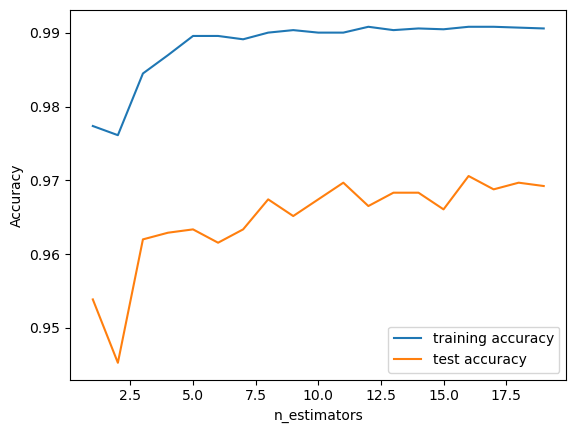

In [53]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt']   # Number of features to consider when looking for the best split
}

# Instantiate the Random Forest classifier
random_forest = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_random_forest = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_random_forest.predict(X_test)

# Print evaluation metrics
accuracy_rf_best = metrics.accuracy_score(y_test, y_pred)
precision_rf_best = metrics.precision_score(y_test, y_pred)
recall_rf_best = metrics.recall_score(y_test, y_pred)
f1_score_rf_best = metrics.f1_score(y_test, y_pred)

print("\nBest Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.970937897270488

Best Model Evaluation Metrics:
Accuracy: []
Precision: []
Recall: []
F1 Score: []


Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Gradient Boosting Classifier with specified hyperparameters
gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.7)

# Train the model on the training data
gbc.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

# Calculate evaluation metrics for training data
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
train_precision = metrics.precision_score(y_train, y_train_pred)
train_recall = metrics.recall_score(y_train, y_train_pred)
train_f1_score = metrics.f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for testing data
test_accuracy_gb = metrics.accuracy_score(y_test, y_test_pred)
test_precision_gb = metrics.precision_score(y_test, y_test_pred)
test_recall_gb = metrics.recall_score(y_test, y_test_pred)
test_f1_score_gb = metrics.f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training Evaluation Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1_score)
print()

print("Testing Evaluation Metrics:")
print("Accuracy:", test_accuracy_gb)
print("Precision:", test_precision_gb)
print("Recall:", test_recall_gb)
print("F1 Score:", test_f1_score_gb)


Training Evaluation Metrics:
Accuracy: 0.9890308718760602
Precision: 0.9862930860713566
Recall: 0.9941080861438439
F1 Score: 0.990185166447435

Testing Evaluation Metrics:
Accuracy: 0.9742198100407056
Precision: 0.9659810126582279
Recall: 0.988663967611336
F1 Score: 0.9771908763505404


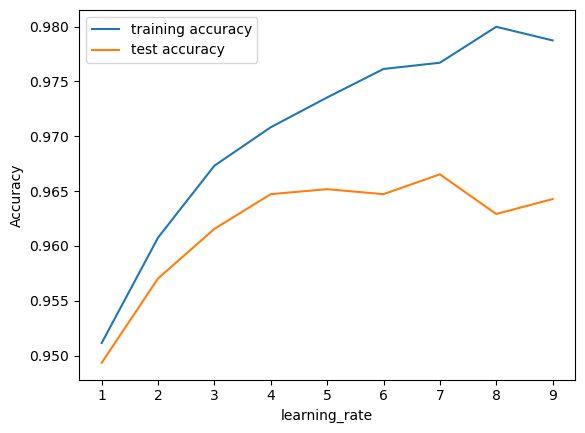

In [56]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Instantiate the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_gradient_boosting = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_gradient_boosting.predict(X_test)

# Print evaluation metrics
accuracy_gb_best = metrics.accuracy_score(y_test, y_pred)
precision_gb_best = metrics.precision_score(y_test, y_pred)
recall_gb_best = metrics.recall_score(y_test, y_pred)
f1_score_gb_best = metrics.f1_score(y_test, y_pred)

print("\nBest Model Evaluation Metrics:")
print("Accuracy:", accuracy_gb_best)
print("Precision:", precision_gb_best)
print("Recall:", recall_gb_best)
print("F1 Score:", f1_score_gb_best)


Best Parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Best Accuracy: 0.9721819214270916

Best Model Evaluation Metrics:
Accuracy: 0.9706015377657169
Precision: 0.9635499207606973
Recall: 0.9846153846153847
F1 Score: 0.973968762515018


CATBOOOST CLASSIFIER

In [58]:
from catboost import CatBoostClassifier
from sklearn import metrics

# Instantiate CatBoost classifier
catboost_model = CatBoostClassifier()

# Train the model
catboost_model.fit(X_train, y_train)

Learning rate set to 0.02613
0:	learn: 0.6504282	total: 155ms	remaining: 2m 34s
1:	learn: 0.6122839	total: 158ms	remaining: 1m 18s
2:	learn: 0.5705997	total: 162ms	remaining: 53.7s
3:	learn: 0.5355387	total: 165ms	remaining: 41.1s
4:	learn: 0.5034580	total: 168ms	remaining: 33.5s
5:	learn: 0.4749131	total: 172ms	remaining: 28.5s
6:	learn: 0.4453259	total: 176ms	remaining: 24.9s
7:	learn: 0.4227034	total: 180ms	remaining: 22.3s
8:	learn: 0.3995902	total: 185ms	remaining: 20.3s
9:	learn: 0.3820830	total: 190ms	remaining: 18.8s
10:	learn: 0.3661383	total: 194ms	remaining: 17.5s
11:	learn: 0.3493950	total: 198ms	remaining: 16.3s
12:	learn: 0.3341237	total: 202ms	remaining: 15.4s
13:	learn: 0.3212196	total: 206ms	remaining: 14.5s
14:	learn: 0.3086781	total: 210ms	remaining: 13.8s
15:	learn: 0.2976031	total: 214ms	remaining: 13.2s
16:	learn: 0.2884995	total: 219ms	remaining: 12.7s
17:	learn: 0.2792431	total: 223ms	remaining: 12.2s
18:	learn: 0.2729584	total: 228ms	remaining: 11.7s
19:	learn:

In [59]:
# Training evaluation
y_train_pred = catboost_model.predict(X_train)
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
f1_score_train = metrics.f1_score(y_train, y_train_pred)
recall_train = metrics.recall_score(y_train, y_train_pred)
precision_train = metrics.precision_score(y_train, y_train_pred)

# Testing evaluation
y_test_pred = catboost_model.predict(X_test)
accuracy_test_cb = metrics.accuracy_score(y_test, y_test_pred)
f1_score_test_cb = metrics.f1_score(y_test, y_test_pred)
recall_test_cb = metrics.recall_score(y_test, y_test_pred)
precision_test_cb = metrics.precision_score(y_test, y_test_pred)
classification_report = metrics.classification_report(y_test, y_test_pred)



In [60]:
# Print evaluation metrics
print("CatBoost Training Evaluation:")
print("Accuracy: {:.3f}".format(accuracy_train))
print("F1 score: {:.3f}".format(f1_score_train))
print("Recall: {:.3f}".format(recall_train))
print("Precision: {:.3f}".format(precision_train))


CatBoost Training Evaluation:
Accuracy: 0.986
F1 score: 0.987
Recall: 0.992
Precision: 0.983


In [61]:
print("\nCatBoost Testing Evaluation:")
print("Accuracy: {:.3f}".format(accuracy_test_cb))
print("F1 score: {:.3f}".format(f1_score_test_cb))
print("Recall: {:.3f}".format(recall_test_cb))
print("Precision: {:.3f}".format(precision_test_cb))
print("\nClassification Report:\n", classification_report)



CatBoost Testing Evaluation:
Accuracy: 0.971
F1 score: 0.974
Recall: 0.981
Precision: 0.967

Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



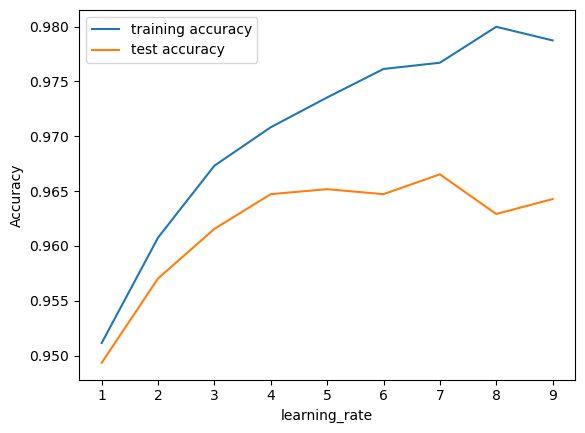

In [62]:
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [63]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distributions
param_dist = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'depth': [4, 6, 8],  # Depth of the trees
    'l2_leaf_reg': uniform(loc=0, scale=1),  # L2 regularization coefficient
    'random_strength': [0.1, 0.5, 1],  # Random strength
}



In [64]:
# Instantiate the CatBoost classifier
catboost = CatBoostClassifier()

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=catboost, param_distributions=param_dist, 
                                   n_iter=20, cv=5, scoring='accuracy', random_state=42)

# Perform random search cross-validation
random_search.fit(X_train, y_train)



0:	learn: 0.6689103	total: 4.98ms	remaining: 493ms
1:	learn: 0.6449780	total: 11.4ms	remaining: 560ms
2:	learn: 0.6229516	total: 17.1ms	remaining: 552ms
3:	learn: 0.6016693	total: 22.6ms	remaining: 541ms
4:	learn: 0.5801204	total: 28ms	remaining: 532ms
5:	learn: 0.5596944	total: 33.1ms	remaining: 518ms
6:	learn: 0.5402548	total: 38.8ms	remaining: 515ms
7:	learn: 0.5232283	total: 44.4ms	remaining: 510ms
8:	learn: 0.5057587	total: 50.2ms	remaining: 508ms
9:	learn: 0.4891615	total: 56ms	remaining: 504ms
10:	learn: 0.4733896	total: 61.7ms	remaining: 499ms
11:	learn: 0.4586295	total: 67.2ms	remaining: 493ms
12:	learn: 0.4441262	total: 73ms	remaining: 488ms
13:	learn: 0.4308983	total: 78.5ms	remaining: 482ms
14:	learn: 0.4192066	total: 83.5ms	remaining: 473ms
15:	learn: 0.4069643	total: 89.4ms	remaining: 469ms
16:	learn: 0.3956378	total: 94.7ms	remaining: 462ms
17:	learn: 0.3848675	total: 99.9ms	remaining: 455ms
18:	learn: 0.3755425	total: 105ms	remaining: 448ms
19:	learn: 0.3649762	total: 1

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000027287A34E80>,
                   n_iter=20,
                   param_distributions={'depth': [4, 6, 8],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002728738C6D0>,
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'random_strength': [0.1, 0.5, 1]},
                   random_state=42, scoring='accuracy')

In [65]:
# Print the best parameters and the corresponding accuracy score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Get the best model
best_catboost = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_catboost.predict(X_test)

# Print evaluation metrics
accuracy_cb_best = metrics.accuracy_score(y_test, y_pred)
precision_cb_best = metrics.precision_score(y_test, y_pred)
recall_cb_best = metrics.recall_score(y_test, y_pred)
f1_score_cb_best = metrics.f1_score(y_test, y_pred)

print("\nBest Model Evaluation Metrics:")
print("Accuracy:", accuracy_cb_best)
print("Precision:", precision_cb_best)
print("Recall:", recall_cb_best)
print("F1 Score:", f1_score_cb_best)


Best Parameters: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 0.7751328233611146, 'learning_rate': 0.05, 'random_strength': 0.5}
Best Accuracy: 0.9727468928172216

Best Model Evaluation Metrics:
Accuracy: 0.9701492537313433
Precision: 0.9635210150674068
Recall: 0.9838056680161943
F1 Score: 0.9735576923076923


In [66]:
# Store testing results
storeResults("CatBoost (Testing)", accuracy, f1_score, recall, precision)

In [67]:
import pandas as pd

# Initialize an empty list to store results
results = []

# Function to call for storing the results
def storeResults(model, accuracy, f1_score, recall, precision):
    results.append({'Model': model,
                    'Accuracy': accuracy,
                    'F1 Score': f1_score,
                    'Recall': recall,
                    'Precision': precision})
# Store testing results
storeResults("Logistic Regression", accuracy_test_log, f1_score_test_log, recall_test_log, precision_test_log)
# Store testing results for KNN
storeResults("KNN ", accuracy_knn, f1_score_knn, recall_knn, precision_knn)

# Store testing results for SVM
storeResults("SVM ", test_accuracy_svm, test_f1_score_svm, test_recall_svm, test_precision_svm)

# Store testing results for Naive Bayes
storeResults("Naive Bayes ", accuracy_nb, f1_score_nb, recall_nb, precision_nb)

# Store testing results for Random Forest
storeResults("Random Forest ", accuracy_rf, f1_score_rf, recall_rf, precision_rf)

# Store testing results for Gradient Boosting
storeResults("Gradient Boosting ", test_accuracy_gb, test_f1_score_gb, test_recall_gb, test_precision_gb)

# Store testing results for CatBoost
storeResults("CatBoost ", accuracy_test_cb, f1_score_test_cb, recall_test_cb, precision_test_cb)

# Convert the list to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


                 Model  Accuracy  F1 Score    Recall  Precision
0  Logistic Regression  0.933514  0.941224  0.953036   0.929700
1                 KNN   0.941203  0.947665  0.953036   0.942354
2                 SVM   0.951153  0.957006  0.973279   0.941269
3         Naive Bayes   0.604704  0.453750  0.293927   0.994521
4       Random Forest   0.969697  0.973017  0.978138   0.967949
5   Gradient Boosting   0.974220  0.977191  0.988664   0.965981
6            CatBoost   0.971054  0.974277  0.981377   0.967279


In [68]:
import pandas as pd

# Initialize an empty list to store results
results = []

# Function to call for storing the results
def storeResults(model, accuracy, f1_score, recall, precision):
    results.append({'Model': model,
                    'Accuracy': accuracy,
                    'F1 Score': f1_score,
                    'Recall': recall,
                    'Precision': precision})

# Store testing results for Logistic Regression
storeResults("Logistic Regression (Tuned)", accuracy_test_best, f1_score_test_best, recall_test_best, precision_test_best)

# Store testing results for KNN
storeResults("KNN (Tuned)", accuracy_knn_best, precision_knn_best, recall_knn_best, f1_score_knn_best)

# Store testing results for SVM
storeResults("SVM (Tuned)", accuracy_svm_best, precision_svm_best, recall_svm_best, f1_score_svm_best)  # Replace with your SVM evaluation metrics

# Store testing results for Naive Bayes
storeResults("Naive Bayes (Tuned)", accuracy_nb_best, precision_nb_best, recall_nb_best, f1_score_nb_best)  # Replace with your Naive Bayes evaluation metrics

# Store testing results for Random Forest
storeResults("Random Forest (Tuned)", accuracy_rf_best, precision_rf_best, recall_rf_best, f1_score_rf_best)  # Replace with your Random Forest evaluation metrics

# Store testing results for Gradient Boosting
storeResults("Gradient Boosting (Tuned)", accuracy_gb_best, precision_gb_best, recall_gb_best, f1_score_gb_best)  # Replace with your Gradient Boosting evaluation metrics

# Store testing results for CatBoost
storeResults("CatBoost (Tuned)", accuracy_cb_best, precision_cb_best, recall_cb_best, f1_score_cb_best)  # Replace with your CatBoost evaluation metrics

# Convert the list to a DataFrame
results_df_tuned = pd.DataFrame(results)

# Display the DataFrame
print(results_df_tuned)


                         Model  Accuracy  F1 Score    Recall  Precision
0  Logistic Regression (Tuned)  0.934871  0.942492  0.955466   0.929866
1                  KNN (Tuned)  0.960651  0.956280  0.974089   0.965102
2                  SVM (Tuned)  0.962913  0.959363  0.974899   0.967068
3          Naive Bayes (Tuned)  0.765265  0.990411  0.585425   0.735878
4        Random Forest (Tuned)  0.967888  0.967095  0.975709   0.971383
5    Gradient Boosting (Tuned)  0.970602  0.963550  0.984615   0.973969
6             CatBoost (Tuned)  0.970149  0.963521  0.983806   0.973558


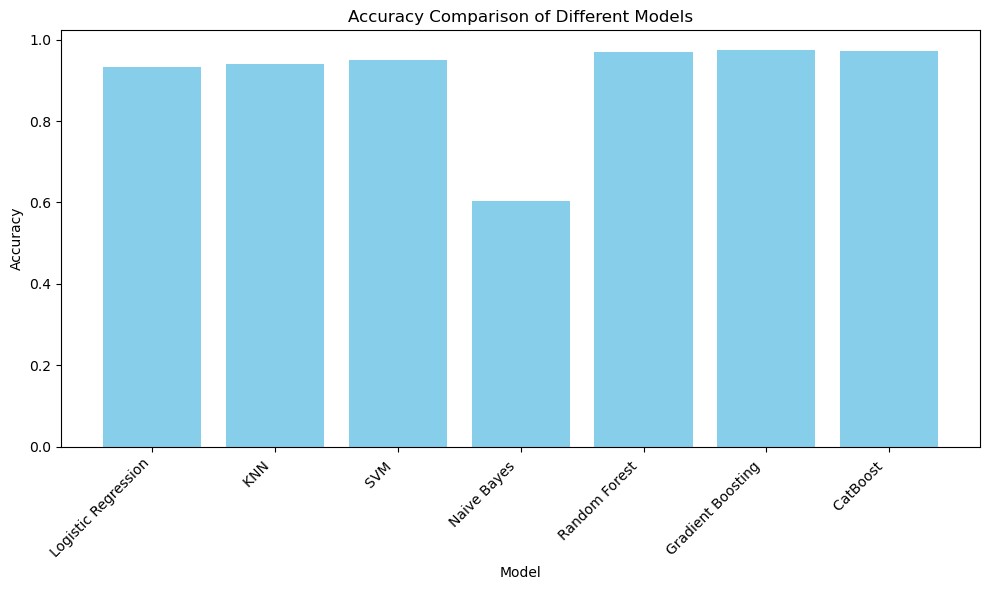

In [69]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the accuracy values
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')

# Set the title and labels
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


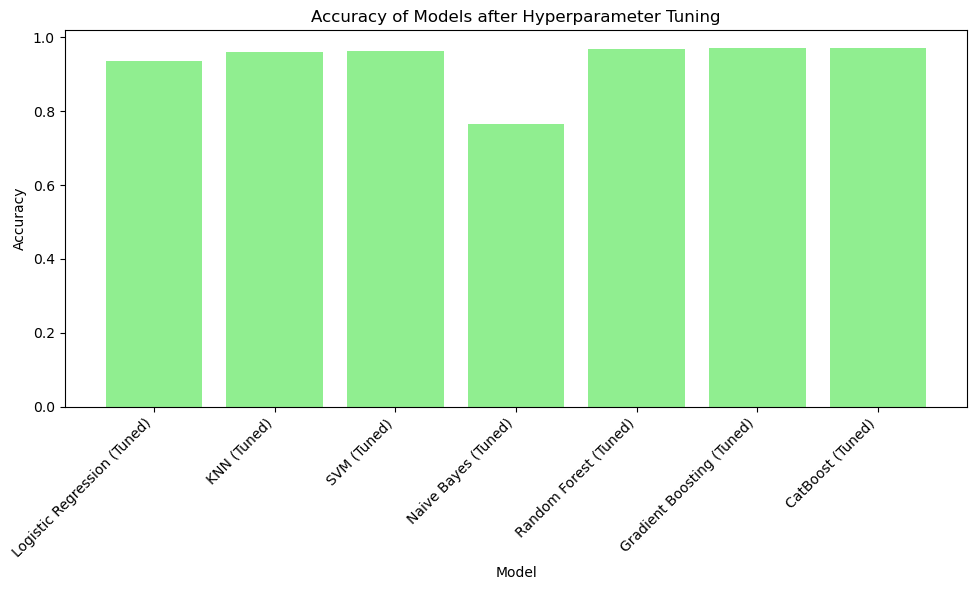

In [70]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the accuracy values for tuned models
plt.bar(results_df_tuned['Model'], results_df_tuned['Accuracy'], color='lightgreen')

# Set the title and labels
plt.title('Accuracy of Models after Hyperparameter Tuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


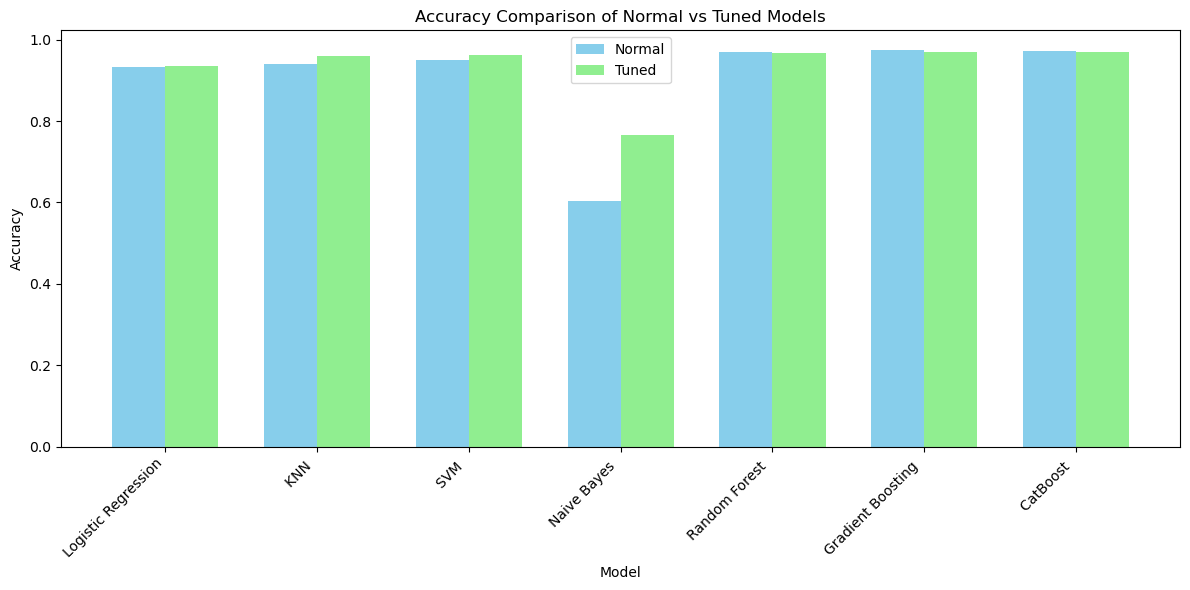

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Set the width of the bars
bar_width = 0.35

# Set the figure size
plt.figure(figsize=(12, 6))

# Define the index for the x-axis ticks
index = np.arange(len(results_df))

# Plot the accuracy values for normal models
plt.bar(index, results_df['Accuracy'], bar_width, color='skyblue', label='Normal')

# Plot the accuracy values for tuned models
plt.bar(index + bar_width, results_df_tuned['Accuracy'], bar_width, color='lightgreen', label='Tuned')

# Set the title and labels
plt.title('Accuracy Comparison of Normal vs Tuned Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Set the x-axis ticks and labels
plt.xticks(index + bar_width / 2, results_df['Model'], rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
